<a href="https://colab.research.google.com/github/tderr24/MAT-422-Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, RocCurveDisplay, roc_auc_score

data = pd.read_csv('diabetes.csv')
df = data[['Glucose','BloodPressure','Insulin','BMI','Outcome']]

X_train, X_test, y_train, y_test = train_test_split(df[['Glucose','BloodPressure','Insulin','BMI']], df['Outcome'], test_size=0.33, random_state=42)

## Logistic regression

In [2]:
log = LogisticRegression(C=1, solver='liblinear')
log.fit(X_train,y_train)

yhat = log.predict(X_test)

print('Accuracy:', accuracy_score(y_test, yhat))

Accuracy: 0.7362204724409449


<Axes: title={'center': 'Absolute Value of Logistic Regression Model Coefficients'}>

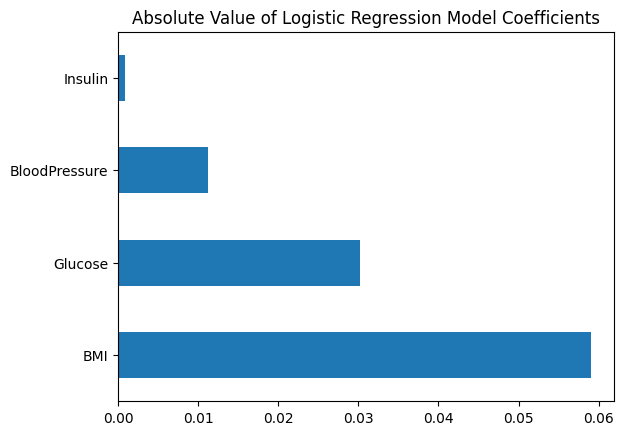

In [3]:
(pd.Series(abs(log.coef_[0]), index=X_train.columns)
   .nlargest(4)
   .plot(kind='barh',title="Absolute Value of Logistic Regression Model Coefficients"))

## Support vector machine

In [4]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, yhat))

Accuracy: 0.7519685039370079


<Axes: title={'center': 'Absolute Value of Support Vector Machine Coefficients'}>

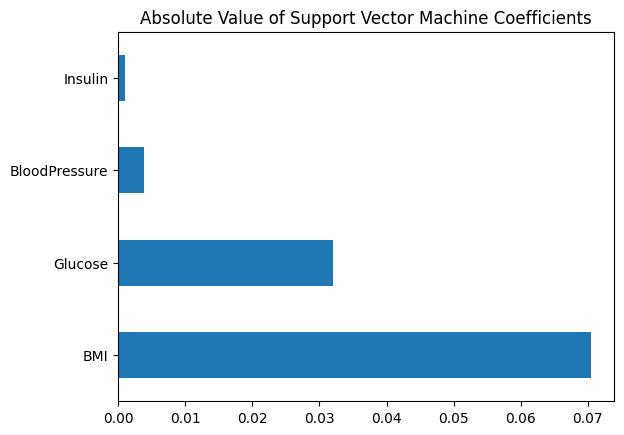

In [5]:
(pd.Series(abs(clf.coef_[0]), index=X_train.columns)
   .nlargest(4)
   .plot(kind='barh',title="Absolute Value of Support Vector Machine Coefficients"))

## Neural Network

In [6]:
clf = MLPClassifier(solver='adam',
                    activation='tanh',
                    alpha=1e-5,
                    hidden_layer_sizes=(100,2),
                   learning_rate='adaptive',
                   max_iter=500)
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)

print('Accuracy:', accuracy_score(y_test, yhat))

Accuracy: 0.7007874015748031


In [7]:
#further data analysis, this uses all available data features

X_train2, X_test2, y_train2, y_test2 = train_test_split(data[data.columns[:-1]], data['Outcome'], test_size=0.33, random_state=42)

log2 = LogisticRegression(C=1, solver='liblinear')
log2.fit(X_train2,y_train2)

yhat2 = log2.predict(X_test2)

print('Accuracy:', accuracy_score(y_test2, yhat2))

Accuracy: 0.7677165354330708


<Axes: title={'center': 'Absolute Value of Logistic Regression Model Coefficients For all Data Features'}>

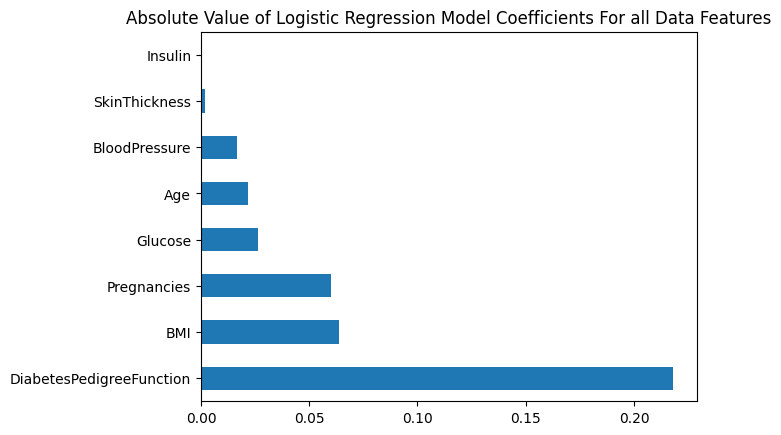

In [8]:
# as can be seen, the DiabetesPedigreeFunction feature has a very high weight and was not included in the original model
# the addition of this feature is likely a contributor to the increase in performance

(pd.Series(abs(log2.coef_[0]), index=X_train2.columns)
   .nlargest(8)
   .plot(kind='barh',title="Absolute Value of Logistic Regression Model Coefficients For all Data Features"))

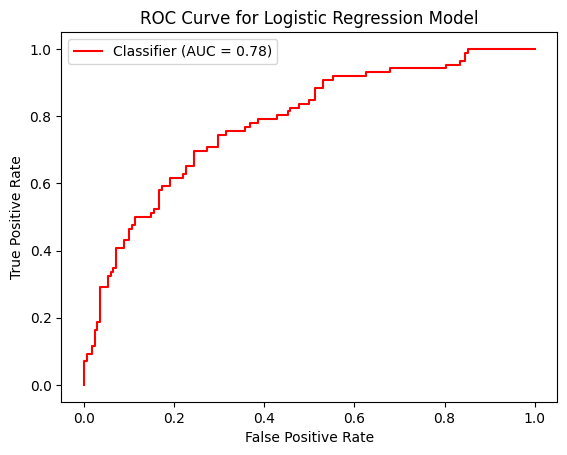

In [10]:
# need to do our Logistic Regression with a probability prediction for the ROC Curve
log3 = LogisticRegression(C=1, solver='liblinear')
log3.fit(X_train,y_train)
yhat3 = log3.predict_proba(X_test)


RocCurveDisplay.from_predictions(
    y_test,
    yhat3[:, 1],
    color="red"
)
plt.title("ROC Curve for Logistic Regression Model")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()